In [1]:

from textblob import TextBlob

In [2]:
import os
import re
import pandas as pd
import numpy as np


In [3]:
# Params for bert model and tokenization
Nsamp = 1000 # number of samples to generate in each class - 'spam', 'not spam'
maxtokens = 200 # the maximum number of tokens per document
maxtokenlen = 100 # the maximum length of each token

In [4]:
def tokenize(row):
    if row is None or row is '':
        tokens = ""
    else:
        try:
            tokens = row.split(" ")[:maxtokens]
        except:
            tokens=""
    return tokens

In [5]:
def reg_expressions(row):
    tokens = []
    try:
        for token in row:
            token = token.lower()
            token = re.sub(r'[\W\d]', "", token)
            token = token[:maxtokenlen] # truncate token
            tokens.append(token)
    except:
        token = ""
        tokens.append(token)
    return tokens

In [6]:
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')    
print(stopwords) # see default stopwords

def stop_word_removal(row):
    token = [token for token in row if token not in stopwords]
    token = filter(None, token)
    return token

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Input data files are available in the "../input/" directory.
filepath = "emails.csv"

# Read the data into a pandas dataframe called emails
emails = pd.read_csv(filepath)

print("Successfully loaded {} rows and {} columns!".format(emails.shape[0], emails.shape[1]))
print(emails.head())

Successfully loaded 517401 rows and 2 columns!
                       file                                            message
0     allen-p/_sent_mail/1.  Message-ID: <18782981.1075855378110.JavaMail.e...
1    allen-p/_sent_mail/10.  Message-ID: <15464986.1075855378456.JavaMail.e...
2   allen-p/_sent_mail/100.  Message-ID: <24216240.1075855687451.JavaMail.e...
3  allen-p/_sent_mail/1000.  Message-ID: <13505866.1075863688222.JavaMail.e...
4  allen-p/_sent_mail/1001.  Message-ID: <30922949.1075863688243.JavaMail.e...


In [128]:
email_sample = emails.head(200)

In [130]:
email_sample.to_csv("email_sample.csv")

In [8]:
# take a closer look at the first email
print(emails.loc[0]["message"])

Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>
Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.belden@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Belden <Tim Belden/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Here is our forecast

 


In [9]:
# Separate headers from the message bodies
import email

def extract_messages(df):
    messages = []
    for item in df["message"]:
        # Return a message object structure from a string
        e = email.message_from_string(item)    
        # get message body  
        message_body = e.get_payload()
        messages.append(message_body)
    print("Successfully retrieved message body from e-mails!")
    return messages

bodies = extract_messages(emails)

Successfully retrieved message body from e-mails!


In [10]:
# extract random 10000 enron email bodies for building dataset
import random
bodies_df = pd.DataFrame(random.sample(bodies, 10000))

# expand default pandas display options to make emails more clearly visible when printed
pd.set_option('display.max_colwidth', 300)

bodies_df.head() # you could do print(bodies_df.head()), but Jupyter displays this nicer for pandas DataFrames

,0
0,"Per Don Black's request, attached is the East Position Report as of 4/30/01. We are also delivering hard copies of this report to you. If you have any questions, please let me know. Thanks.\n\n"
1,"They are being contacted and should oppose if they think about it twice.\nMike\n\n-----Original Message-----\nFrom: Jeff.Dasovich@enron.com [mailto:Jeff.Dasovich@enron.com]\nSent: Tuesday, July 17, 2001 10:56 AM\nTo: MDay\nSubject: RE: AB 23XX Bad Bill Alert\n\n\n\nI want to find out what the gr..."
2,"Harry, Please forward to anyone else who needs to see this.\n\nSue Mara\nEnron Corp.\nTel: (415) 782-7802\nFax:(415) 782-7854\n----- Forwarded by Susan J Mara/NA/Enron on 07/30/2001 02:11 PM -----\n\n\n\tJBennett <JBennett@GMSSR.com> 07/30/2001 02:07 PM \t To: ""Sue Mara (E-mail)"" <smara@enron...."
3,"Steve,\n\nI am glad you feel better. \n\nPlease, let Debbie know that she should not hesitate\nto call on me or Paula (or the rest of he Woodlands\ncrowd if she needs help). \n\n\nVince\n\n\n\n\n\nstevestock@pagenetips.com on 01/31/2001 06:16:13 AM\nTo: vince.j.kaminski@enron.com\ncc: \nSubje..."
4,"Alert Posted:3:45 PM November 18, 2000: CGC Interruptible notice for Mon., \n11/20/00 at 10 AM.\n\nATTENTION CGC INTERRUPTIBLE CUSTOMERS AND THEIR SHIPPERS:\nEffective at 10 AM, Monday, November 20, 2000 and until further notice, \nChattanooga Gas Company (CGC) is issuing a curtailment order f..."


In [11]:
filepath = "fradulent_emails.txt"
with open(filepath, 'r',encoding="latin1") as file:
    data = file.read()
    
# split on a code word appearing close to the beginning of each email
fraud_emails = data.split("From r")

print("Successfully loaded {} spam emails!".format(len(fraud_emails)))

Successfully loaded 3978 spam emails!


In [12]:
fraud_bodies = extract_messages(pd.DataFrame(fraud_emails,columns=["message"],dtype=str))
fraud_bodies_df = pd.DataFrame(fraud_bodies[1:])

fraud_bodies_df.head() # you could do print(fraud_bodies_df.head()), but Jupyter displays this nicer for pandas DataFrames

Successfully retrieved message body from e-mails!


,0
0,"FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-27-587908.\nE-MAIL: (james_ngola2002@maktoob.com).\n\nURGENT BUSINESS ASSISTANCE AND PARTNERSHIP.\n\n\nDEAR FRIEND,\n\nI AM ( DR.) JAMES NGOLA, THE PERSONAL ASSISTANCE TO THE LATE CONGOLESE (PRESIDENT LAURENT KABILA) WHO WAS ASSASSINATED BY HIS BODY G..."
1,"Dear Friend,\n\nI am Mr. Ben Suleman a custom officer and work as Assistant controller of the Customs and Excise department Of the Federal Ministry of Internal Affairs stationed at the Murtala Mohammed International Airport, Ikeja, Lagos-Nigeria.\n\nAfter the sudden death of the former Head of s..."
2,"FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF ELEME KINGDOM \nCHIEF DANIEL ELEME, PHD, EZE 1 OF ELEME.E-MAIL \nADDRESS:obong_715@epatra.com \n\nATTENTION:PRESIDENT,CEO Sir/ Madam. \n\nThis letter might surprise you because we have met\nneither in person nor by correspondence. But I believe\nit is..."
3,"FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF ELEME KINGDOM \nCHIEF DANIEL ELEME, PHD, EZE 1 OF ELEME.E-MAIL \nADDRESS:obong_715@epatra.com \n\nATTENTION:PRESIDENT,CEO Sir/ Madam. \n\nThis letter might surprise you because we have met\nneither in person nor by correspondence. But I believe\nit is..."
4,"Dear sir, \n \nIt is with a heart full of hope that I write to seek your help in respect of the context below. I am Mrs. Maryam Abacha the former first lady of the former Military Head of State of Nigeria General Sani Abacha whose sudden death occurred on 8th of June 1998 as a result of cardiac ..."


In [13]:
# Convert everything to lower-case, truncate to maxtokens and truncate each token to maxtokenlen
EnronEmails = bodies_df.iloc[:,0].apply(tokenize)
EnronEmails = EnronEmails.apply(stop_word_removal)
EnronEmails = EnronEmails.apply(reg_expressions)
EnronEmails = EnronEmails.sample(Nsamp)

SpamEmails = fraud_bodies_df.iloc[:,0].apply(tokenize)
SpamEmails = SpamEmails.apply(stop_word_removal)
SpamEmails = SpamEmails.apply(reg_expressions)
SpamEmails = SpamEmails.sample(Nsamp)

raw_data = pd.concat([SpamEmails,EnronEmails], axis=0).values

In [14]:
print("Shape of combined data represented as numpy array is:")
print(raw_data.shape)
print("Data represented as numpy array is:")
print(raw_data)

# corresponding labels
Categories = ['spam','notspam']
header = ([1]*Nsamp)
header.extend(([0]*Nsamp))

Shape of combined data represented as numpy array is:
(2000,)
Data represented as numpy array is:
[list([]) list([])
 list(['greetings', 'youdear', 'friendmy', 'name', 'mr', 'dennis', 'stevensonthechairman', 'board', 'directors', 'bank', 'ofscotland', 'united', 'kingdomi', 'written', 'seek', 'help', 'assistancei', 'wish', 'make', 'atransfer', 'money', 'involving', 'huge', 'amount', 'money', 'worth', 'fifteenmillion', 'pounds', 'sterlings', 'capounds', 'sterlingsi', 'amproposing', 'make', 'transfer', 'bank', 'account', 'choicethus', 'need', 'help', 'support', 'i', 'propose', 'offer', '', 'thetotal', 'amount', 'share', 'transfer', 'beensuccessfully', 'concluded', '', 'family', 'i', 'why', 'will', 'expenses', 'made', 'transfer', 'processkindlyreply', 'stating', 'interest', 'i', 'shall', 'give', 'details', 'andnecessary', 'proceedure', 'make', 'transferi', 'anxiously', 'awaityour', 'response', 'send', 'replies', 'dennistevenson_officeyahoocoukthanks', 'godbless', 'youthanks', 'god', 'bless

In [15]:
def unison_shuffle(a, b):
    p = np.random.permutation(len(b))
    data = a[p]
    header = np.asarray(b)[p]
    return data, header

# function for converting data into the right format, due to the difference in required format from sklearn models
# we expect a single string per email here, versus a list of tokens for the sklearn models previously explored
def convert_data(raw_data,header):
    converted_data, labels = [], []
    for i in range(raw_data.shape[0]):
        out = ' '.join(raw_data[i])
        converted_data.append(out)
        labels.append(header[i])
        #print(i)
    converted_data = np.array(converted_data, dtype=object)[:, np.newaxis]
    
    return converted_data, np.array(labels)

raw_data, header = unison_shuffle(raw_data, header)

# split into independent 70% training and 30% testing sets
idx = int(0.7*raw_data.shape[0])
# 70% of data for training
train_x, train_y = convert_data(raw_data[:idx],header[:idx])
# remaining 30% for testing
test_x, test_y = convert_data(raw_data[idx:],header[idx:])

print("train_x/train_y list details, to make sure it is of the right form:")
print(len(train_x))
print(train_x)
print(train_y[:5])
print(train_y.shape)


train_x/train_y list details, to make sure it is of the right form:
1400
[['mr laythank lunch yesterday i really enjoy spending time family as i mentioned yesterday i internal public relations suggestions review please feel free contact wish discuss further i would welcome opportunity expand suggestions help way deem necessary i ga make money back wednesday you thoughts prayersyours sincerelyamanda dayassociateenron north americasoutheast power']
 ['from the desk of dr richard akuezedirector project implementationnigerian national petroleumcorporation nnpc joint venturei strongly apologize unsolicited mail iam constrained circumstances surrounding myprofession i mandate colleagues inoffice solicite assistance deal wewant executethe business involves remittance ofusmtwenty eight million six hundred thousandunited states dollars bank account thecentral bank nigeria the money accrued throughdeliberate overinvoicing old projects executed forthe government foreign firms i fewofficials worke

In [60]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score  
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier 


#import metrics libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [17]:
#for each word in the email text, get the base form of the word and return the list of base words
def split_into_lemmas(message):
    #print(message)
    message = message[0].lower()
    words = TextBlob(message).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words]

In [110]:
#function to apply the count vectorizer(BOW) and TF-IDF transforms to a set of input features
def features_transform(mail):
    #get the bag of words for the mail text
    with open('train-features.pickle', 'rb') as handle:
        train_x22 = pickle.load(handle)
    #train_x22 = np.load('train-features.npy', allow_pickle=True)
    bow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(train_x22)
    #print(len(bow_transformer.vocabulary_))
    messages_bow = bow_transformer.transform(mail)
    #print sparsity value
    print('sparse matrix shape:', messages_bow.shape)
    print('number of non-zeros:', messages_bow.nnz) 
    print('sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))
    #apply the TF-IDF transform to the output of BOW
    tfidf_transformer = TfidfTransformer().fit(messages_bow)
    messages_tfidf = tfidf_transformer.transform(messages_bow)
    #print(messages_tfidf.shape)
    #return result of transforms
    return messages_tfidf

In [51]:
train_x1 = pd.DataFrame(train_x, columns = ['message'])
train_y1 = pd.DataFrame(train_y, columns = ['label'])
test_x1 = pd.DataFrame(test_x, columns = ['message'])
test_y1 = pd.DataFrame(test_y, columns = ['label'])

In [63]:
print(type(train_x))
print(test_x1.shape)

<class 'numpy.ndarray'>
(600, 1)


In [53]:
#transform training set features into a set of useful features to build models
train_features=features_transform(train_x)
#transform test features to test the model performance
test_features=features_transform(test_x)

sparse matrix shape: (1400, 21031)
number of non-zeros: 88432
sparsity: 0.30%
sparse matrix shape: (600, 21031)
number of non-zeros: 31594
sparsity: 0.25%


In [58]:

#function which takes in y test value and y predicted value and prints the associated model performance metrics
def model_assessment(y_test,predicted_class):
    print('confusion matrix')
    print(confusion_matrix(y_test,predicted_class))
    print('accuracy')
    print(accuracy_score(y_test,predicted_class))
    print('precision')
    print(precision_score(y_test,predicted_class,pos_label=1))
    print('recall')
    print(recall_score(y_test,predicted_class,pos_label=1))
    print('f-Score')
    print(f1_score(y_test,predicted_class,pos_label=1))
    print('AUC')
    print(roc_auc_score(np.where(y_test==1,1,0),np.where(predicted_class==1,1,0)))
    plt.matshow(confusion_matrix(y_test, predicted_class), cmap=plt.cm.binary, interpolation='nearest')
    plt.title('confusion matrix')
    plt.colorbar()
    plt.ylabel('expected label')
    plt.xlabel('predicted label')

In [47]:

#create and fit NB model
modelNB=MultinomialNB()

In [48]:
modelNB.fit(train_features,train_y1)

C:\Users\HP\miniconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [54]:

#NB predictions
predicted_class_NB=modelNB.predict(test_features)

In [34]:
(test_features.shape)

(1, 1)

In [ ]:
print(test_x1.shape)
print(test_features.shape)
print(predicted_class_NB[0].shape)
print(test_y1.shape)

confusion matrix
[[294  11]
 [  0 295]]
accuracy
0.9816666666666667
precision
0.9640522875816994
recall
1.0
f-Score
0.9816971713810315
AUC
0.9819672131147541


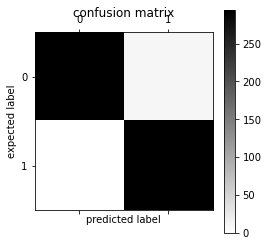

In [61]:


model_assessment(test_y1,predicted_class_NB)

In [66]:
with open('train-test.npy', 'rb') as f:
    train_x = np.load(f)
    train_y = np.load(f)
    test_x = np.load(f)
    test_y = np.load(f)

ValueError: Object arrays cannot be loaded when allow_pickle=False

In [68]:
dt = np.load('train-test.npy', allow_pickle=True)

In [70]:
len(dt[0])

1

In [71]:
np.save("f.npy", dt)

In [108]:
with open('train-features.pickle', 'rb') as handle:
    dt1 = pickle.load(handle)

In [111]:
ff = features_transform(dt1)


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [112]:
dt1 == train_x

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [113]:
dt1[0]

array([''], dtype=object)

In [82]:
train_x[0]

array(['mr laythank lunch yesterday i really enjoy spending time family as i mentioned yesterday i internal public relations suggestions review please feel free contact wish discuss further i would welcome opportunity expand suggestions help way deem necessary i ga make money back wednesday you thoughts prayersyours sincerelyamanda dayassociateenron north americasoutheast power'],
      dtype=object)

In [86]:
type(train_x)

numpy.ndarray

In [92]:
import pickle

In [119]:
with open('train-features.pickle', 'wb') as handle:
    pickle.dump(train_x, handle)

In [131]:
with open('train-features.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [132]:
train_x == b

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [133]:
b

array([['from george amachreegeneral manager financenigeria lng limitedc  c towersplot c sanusi fafunwa streetcvictoria islandcpe me be c marinac lagosenigeriaewwwenlngecomrea transfer of usdccetwenty millionc five hundred thousand united states dollars only to a safe accountesircit warmest pleasure writing confidential business offer irrespective factthat met done thing reimpose absolute confidence neverthelessc adage says day begins story line strong perspective i determined to communicate much conviction give proposal a second thought considerationeas earlier stated i mr daniel amachree general manager finance working nigeria liquefied natural gas nlnge my agency produce export nlg ngl safelyc reliably profitablec grow business full potentialc helping put flares nigeria and virtue unique position office general manager financee i elevated commission become chairman foreign contract tender board committee whose responsibility award supervise foreign contract ensure executed promptlye

In [125]:
b[0]

array(['mr laythank lunch yesterday i really enjoy spending time family as i mentioned yesterday i internal public relations suggestions review please feel free contact wish discuss further i would welcome opportunity expand suggestions help way deem necessary i ga make money back wednesday you thoughts prayersyours sincerelyamanda dayassociateenron north americasoutheast power'],
      dtype=object)